In [3]:
import os
import shutil
import glob
import json
from ffmpeg import FFmpeg
import tqdm.auto as tqdm
from pyannote.audio import Pipeline as PyannotePipeline
import dotenv
import torch

from utils import *

dotenv.load_dotenv()

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

/Users/isaac/miniforge3/envs/pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/isaac/miniforge3/envs/pytorch/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <9A4710B9-0DA3-36BB-9129-645F282E64B2> /Users/isaac/miniforge3/envs/pytorch/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <03BFC270-EF54-36FC-B102-371F5164D3C9> /Users/isaac/miniforge3/envs/pytorch/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
os.makedirs("audio_tracks", exist_ok=True)

video_paths = glob.glob("../RuPaul's Drag Race/*/*", recursive=True)
for video_path in tqdm.tqdm(video_paths):
    audio_path = os.path.join("audio_tracks", ".".join(os.path.basename(video_path).split(".")[:-1]) + ".mp3")
    if os.path.exists(audio_path):
        continue
    # audio_path = unique_path(audio_path)
    FFmpeg().input(video_path).output(audio_path).execute()

  0%|          | 0/8 [00:00<?, ?it/s]

In [6]:
diarization_pipeline = PyannotePipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1", use_auth_token=os.getenv("HUGGINGFACE_TOKEN")
)
diarization_pipeline.to(device)

In [14]:
class YourCustomHook:
    def __init__(self, pbar):
        self.pbar = pbar

    def __call__(
        self,
        step_name,
        step_artifact,
        file=None,
        total=None,
        completed=None,
    ):
        pbar.total = total
        previous_progress = pbar.n
        new_progress = completed - previous_progress if completed is not None else 0
        pbar.update(new_progress)
        status = f"{step_name}, {step_artifact}, {file}, {total}, {completed}"
        pbar.write(step_name)


with tqdm.tqdm(total=1) as pbar:
    hook = YourCustomHook(pbar)
    diarization_pipeline("audio_tracks/RuPaul_s Drag Race S01E01.mp3", hook=hook)

  0%|          | 0/1 [00:00<?, ?it/s]

0
32
64
96
128
160
192
224
256
288
320
352
384
416
448
480
512
544
576
608
640
672
704
736
768
800
832
864
896
928
960
992
1024
1056
1088
1120
1152
1184
1216
1248
1280
1312
1344
1376
1408
1440
1472
1504
1536
1568
1600
1632
1664
1696
1728
1760
1792
1824
1856
1888
1920
1952
1984
2016
2048
2080
2112
2144
2176
2208
2240
2272
2304
2336
2368
2400
2432
2464
2496
2528
2560
2543
None
None
0
1


In [19]:
d = diarization_pipeline("clip.mp3")

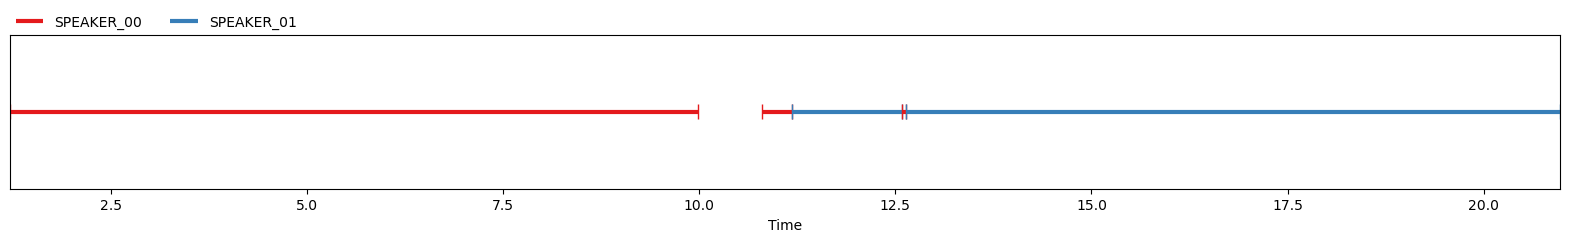

In [20]:
d